In [2]:
print("Hello, R in Jupyter!")

[1] "Hello, R in Jupyter!"


In [1]:
# Basic arithmetic
result <- 2 + 2
print(result)

[1] 4


In [2]:
root_dir = '/Users/f0053cz/Documents/psyanim_v2/scripts_for_beh_paper/data/subtlety_playfight_data/'
data <- read.csv(paste(root_dir,'curvefit_traits_merged_linearpf.csv', sep = "/"))
# print(data)
head(data, 5)

,X,index,subID,r_squared_subt,nrmse_subt,aic_subt,center,PSE_subt,sigma,bias_xmin_subt,⋯,comm,posAffect,negAffect,neuroticism,extraversion,openness,agreeableness,conscientiousness,loneliness,nfriends
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,30002,0.9789465,0.05958450,-35.48504,0.5461832,0.5529510,0.10335957,0.031291240,⋯,16.00000,20,0,38,28.00000,31.00000,34,39,56,3
2,1,1,30004,0.9947840,0.03131009,-44.49341,0.3112003,0.2768959,0.07686605,0.194060972,⋯,15.00000,25,11,38,26.18182,50.00000,50,46,56,3
3,2,2,30005,0.9856356,0.04832041,-38.41862,0.3800630,0.3205832,0.11535284,0.249788688,⋯,16.00000,20,21,51,39.00000,40.00000,43,19,41,5
4,3,3,30006,0.9837098,0.05739903,-36.00819,0.4658866,0.4648232,0.07922090,0.009432723,⋯,3.00000,25,0,18,41.00000,31.00000,44,57,30,4
5,4,4,30008,0.9007922,0.11023567,-26.87189,0.3854147,0.3251178,0.17258480,0.289378203,⋯,12.22222,28,4,27,46.00000,42.54545,46,50,45,5


In [3]:
colnames(data)

[1] "X"                 "index"             "subID"            
 [4] "r_squared_subt"    "nrmse_subt"        "aic_subt"         
 [7] "center"            "PSE_subt"          "sigma"            
[10] "bias_xmin_subt"    "bias_xmax_subt"    "bias_lower_subt"  
[13] "bias_upper_subt"   "flipped_subt"      "range_subt"       
[16] "bias_subt"         "r_squared_pf"      "nrmse_pf"         
[19] "aic_pf"            "PSE_pf"            "slope"            
[22] "intercept"         "bias_xmin_pf"      "bias_xmax_pf"     
[25] "bias_lower_pf"     "bias_upper_pf"     "flipped_pf"       
[28] "range_pf"          "bias_pf"           "social_skill"     
[31] "attn_switch"       "img"               "attn_to_det"      
[34] "comm"              "posAffect"         "negAffect"        
[37] "neuroticism"       "extraversion"      "openness"         
[40] "agreeableness"     "conscientiousness" "loneliness"       
[43] "nfriends"

In [4]:
# Print the dimensions of the data frame
print(dim(data))

# Drop rows with NA values
data <- na.omit(data)

# Print the dimensions of the data frame after dropping NA values
print(dim(data))

[1] 276  43
[1] 275  43


In [5]:
# new_terms = ['obj_center','amplitude','bias_xmin_norm','sigma']
new_terms <- c('PSE_subt', 'range_subt', 'bias_subt', 'PSE_pf', 'range_pf', 'bias_pf', 'slope_pf', 'intercept_pf')

In [6]:
# for (param in new_terms) {
#   pf_col <- paste(param, '_pf', sep = '')
#   subt_col <- paste(param, '_subt', sep = '')
#   diff_col <- paste(param, '_diff', sep = '')
#   data[[diff_col]] <- data[[pf_col]] - data[[subt_col]]
# }
# head(data,5)

In [7]:
# data <- subset(data, amplitude_pf > 0)
# print(dim(data))

# mult reg (relevant traits and curve fits)

In [8]:
# from pymer4.models import Lmer,Lm

In [9]:
install.packages("dplyr")
library(dplyr)

# # Rename specific columns
# data <- data %>% rename(
#   pos_affect = Positive_reweigh,
#   PSE_subt = obj_center_subt,
#   range_subt = amplitude_subt,
#   bias_subt = bias_xmin_norm_subt,
#   PSE_pf = obj_center_pf,
#   range_pf = amplitude_pf,
#   bias_pf = bias_xmin_norm_pf,
#   PSE_diff = obj_center_diff,
#   range_diff = amplitude_diff,
#   bias_diff = bias_xmin_norm_diff
# )

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [15]:
m1 <- lm(posAffect ~ PSE_subt + range_subt + bias_subt + sigma, data = data)
summary(m1)


Call:
lm(formula = posAffect ~ PSE_subt + range_subt + bias_subt + 
    sigma, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.6997  -5.5846  -0.1063   5.6100  18.6052 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   25.590      3.946   6.484 4.22e-10 ***
PSE_subt      -1.504      6.247  -0.241    0.810    
range_subt    -6.100      3.764  -1.621    0.106    
bias_subt      3.242      3.444   0.941    0.347    
sigma        -14.581     12.258  -1.190    0.235    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.408 on 270 degrees of freedom
Multiple R-squared:  0.02251,	Adjusted R-squared:  0.00803 
F-statistic: 1.555 on 4 and 270 DF,  p-value: 0.1868


In [40]:
m2 <- lm(posAffect ~ PSE_pf + slope , data = data)
summary(m2)


Call:
lm(formula = posAffect ~ PSE_pf + slope, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.4267  -6.3960   0.3045   6.0727  17.7673 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   18.930      1.953   9.693   <2e-16 ***
PSE_pf         0.101      3.275   0.031   0.9754    
slope          4.458      2.380   1.873   0.0622 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.417 on 272 degrees of freedom
Multiple R-squared:  0.01328,	Adjusted R-squared:  0.006029 
F-statistic: 1.831 on 2 and 272 DF,  p-value: 0.1622


In [39]:
m3 <- lm(posAffect ~ PSE_subt + range_subt + bias_subt + sigma + PSE_pf + slope, data = data)
summary(m3)


Call:
lm(formula = posAffect ~ PSE_subt + range_subt + bias_subt + 
    sigma + PSE_pf + slope, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.3946  -5.7664   0.3238   5.7982  17.4321 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  25.4187     4.0681   6.248 1.62e-09 ***
PSE_subt     -2.1267     6.2009  -0.343  0.73189    
range_subt   -9.0417     3.8973  -2.320  0.02109 *  
bias_subt     0.6503     3.5654   0.182  0.85542    
sigma       -13.8669    12.1796  -1.139  0.25591    
PSE_pf       -0.5214     3.2770  -0.159  0.87369    
slope         7.2030     2.7724   2.598  0.00989 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.334 on 268 degrees of freedom
Multiple R-squared:  0.04678,	Adjusted R-squared:  0.02543 
F-statistic: 2.192 on 6 and 268 DF,  p-value: 0.0441


In [41]:
m4 <- lm(posAffect ~ PSE_subt * range_subt * bias_subt * sigma * PSE_pf * slope, data = data)
summary(m4)


Call:
lm(formula = posAffect ~ PSE_subt * range_subt * bias_subt * 
    sigma * PSE_pf * slope, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.8128  -4.9054   0.4608   4.2578  19.0145 

Coefficients:
                                                  Estimate Std. Error t value
(Intercept)                                         248.63    1359.72   0.183
PSE_subt                                          -1573.65    3236.88  -0.486
range_subt                                        -1151.80    2344.06  -0.491
bias_subt                                           -37.01    1523.83  -0.024
sigma                                             -2309.50   14816.99  -0.156
PSE_pf                                              111.68    3051.13   0.037
slope                                              -662.93    2765.60  -0.240
PSE_subt:range_subt                                3980.92    5476.43   0.727
PSE_subt:bias_subt                                 1926.38    3652.46

In [42]:
anova(m1,m3,m4)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,270,19089.78,NA,NA,NA,NA
2,268,18615.90,2,473.8701,3.2950251,0.03898353
3,211,15172.36,57,3443.5467,0.8401571,0.77900202


In [43]:
anova(m2,m3,m4)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,272,19269.98,NA,NA,NA,NA
2,268,18615.90,4,654.0741,2.2740309,0.06242584
3,211,15172.36,57,3443.5467,0.8401571,0.77900202


In [33]:
m2 <- lm(posAffect ~ PSE_subt + range_subt + bias_subt, data = data)
summary(m2)


Call:
lm(formula = posAffect ~ PSE_subt + range_subt + bias_subt, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.9253  -5.3653  -0.1727   5.7761  18.7884 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   23.325      3.459   6.743 9.35e-11 ***
PSE_subt      -1.893      6.244  -0.303    0.762    
range_subt    -4.752      3.592  -1.323    0.187    
bias_subt      3.325      3.446   0.965    0.335    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.415 on 271 degrees of freedom
Multiple R-squared:  0.01739,	Adjusted R-squared:  0.006511 
F-statistic: 1.599 on 3 and 271 DF,  p-value: 0.19


In [34]:
anova(m2,m1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,271,19189.83,NA,NA,NA,NA
2,270,19089.78,1,100.05,1.415077,0.2352604


In [35]:
m3 <- lm(posAffect ~  PSE_subt + range_subt, data = data)
summary(m3)


Call:
lm(formula = posAffect ~ PSE_subt + range_subt, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.8574  -5.3355  -0.4284   5.8955  19.5202 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   25.903      2.196  11.794   <2e-16 ***
PSE_subt      -5.604      4.918  -1.140    0.255    
range_subt    -2.963      3.076  -0.963    0.336    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.414 on 272 degrees of freedom
Multiple R-squared:  0.01401,	Adjusted R-squared:  0.006763 
F-statistic: 1.933 on 2 and 272 DF,  p-value: 0.1467


In [36]:
m4 <- lm(posAffect ~  bias_subt, data = data)
summary(m4)


Call:
lm(formula = posAffect ~ bias_subt, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.224  -5.916   0.023   5.788  18.040 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   19.717      2.006   9.827   <2e-16 ***
bias_subt      2.794      2.651   1.054    0.293    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.441 on 273 degrees of freedom
Multiple R-squared:  0.004054,	Adjusted R-squared:  0.0004063 
F-statistic: 1.111 on 1 and 273 DF,  p-value: 0.2927


In [37]:
anova(m4,m3,m2,m1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,273,19450.23,NA,NA,NA,NA
2,272,19255.75,1,194.47641,2.7506154,0.09837822
3,271,19189.83,1,65.92426,0.9324127,0.33510085
4,270,19089.78,1,100.05000,1.4150769,0.23526044


In [20]:
m2 <- lm(posAffect ~ PSE_subt*range_subt*bias_subt, data = data)
summary(m2)


Call:
lm(formula = posAffect ~ PSE_subt * range_subt * bias_subt, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.7823  -6.1169  -0.1616   5.3766  18.8035 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)
(Intercept)                      3.851     28.656   0.134    0.893
PSE_subt                        60.375     58.756   1.028    0.305
range_subt                      12.027     47.133   0.255    0.799
bias_subt                       33.434     34.232   0.977    0.330
PSE_subt:range_subt            -61.040     97.565  -0.626    0.532
PSE_subt:bias_subt            -101.795     72.674  -1.401    0.162
range_subt:bias_subt           -32.030     56.346  -0.568    0.570
PSE_subt:range_subt:bias_subt  115.045    119.762   0.961    0.338

Residual standard error: 8.408 on 267 degrees of freedom
Multiple R-squared:  0.03343,	Adjusted R-squared:  0.008093 
F-statistic: 1.319 on 7 and 267 DF,  p-value: 0.2411


In [21]:
anova(m1,m2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,271,19189.83,NA,NA,NA,NA
2,267,18876.47,4,313.3575,1.108079,0.3530687


In [28]:
aic_results <- AIC(m1,m2)
aic_df <- as.data.frame(aic_results)
aic_df

,df,AIC
,<dbl>,<dbl>
m1,5,1957.891
m2,9,1961.364


- m1 and m2 are similar - so adding interction to subtlety doesnt help
- from m1, no effect of subt on posAffect

In [22]:
m3 <- lm(posAffect ~ slope+PSE_pf, data = data)
summary(m3)


Call:
lm(formula = posAffect ~ slope + PSE_pf, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.4267  -6.3960   0.3045   6.0727  17.7673 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   18.930      1.953   9.693   <2e-16 ***
slope          4.458      2.380   1.873   0.0622 .  
PSE_pf         0.101      3.275   0.031   0.9754    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.417 on 272 degrees of freedom
Multiple R-squared:  0.01328,	Adjusted R-squared:  0.006029 
F-statistic: 1.831 on 2 and 272 DF,  p-value: 0.1622


In [23]:
# model = Lm(f'Positive_reweigh ~ obj_center_pf*amplitude_pf*bias_xmin_norm_pf', data=df) # ff: anglesm rfx: subject ID
# model.fit()
m4 <- lm(posAffect ~ slope*PSE_pf, data = data)
summary(m4)


Call:
lm(formula = posAffect ~ slope * PSE_pf, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.6124  -6.5297   0.2926   6.1723  18.2014 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    17.766      3.130   5.676 3.54e-08 ***
slope           7.291      6.405   1.138    0.256    
PSE_pf          3.036      6.978   0.435    0.664    
slope:PSE_pf   -6.696     14.052  -0.477    0.634    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.429 on 271 degrees of freedom
Multiple R-squared:  0.01411,	Adjusted R-squared:  0.003196 
F-statistic: 1.293 on 3 and 271 DF,  p-value: 0.2772


In [24]:
anova(m3,m4)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,272,19269.98,NA,NA,NA,NA
2,271,19253.85,1,16.13226,0.2270633,0.6340939


In [27]:
aic_results <- AIC(m3,m4)
aic_df <- as.data.frame(aic_results)
aic_df

,df,AIC
,<dbl>,<dbl>
m3,4,1957.038
m4,5,1958.807


- m3 and m4 are similar - so adding interction to pf doesnt help
- from m3, no sig. effect of pf on posAffect, but there's a trend - slope (rate of shift to playfulness) may increase with positive affect score

In [29]:
m5 <- lm(posAffect ~ PSE_subt + range_subt + bias_subt + slope + PSE_pf, data = data)
summary(m5)


Call:
lm(formula = posAffect ~ PSE_subt + range_subt + bias_subt + 
    slope + PSE_pf, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.3041  -5.6405   0.1719   5.6221  17.6389 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  23.3580     3.6452   6.408 6.58e-10 ***
PSE_subt     -2.5178     6.1948  -0.406   0.6847    
range_subt   -7.7975     3.7430  -2.083   0.0382 *  
bias_subt     0.7242     3.5668   0.203   0.8392    
slope         7.2951     2.7727   2.631   0.0090 ** 
PSE_pf       -0.7744     3.2713  -0.237   0.8131    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.339 on 269 degrees of freedom
Multiple R-squared:  0.04217,	Adjusted R-squared:  0.02436 
F-statistic: 2.368 on 5 and 269 DF,  p-value: 0.03987


In [106]:
m51 <- lm(posAffect ~ PSE_subt + range_subt + slope + PSE_pf , data = data)
summary(m51)


Call:
lm(formula = posAffect ~ PSE_subt + range_subt + slope + PSE_pf, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.7137  -5.6564   0.0345   5.7440  17.7609 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  23.8521     2.7091   8.804  < 2e-16 ***
PSE_subt     -3.2686     4.9612  -0.659  0.51056    
range_subt   -7.5038     3.4462  -2.177  0.03031 *  
slope         7.4468     2.6654   2.794  0.00558 ** 
PSE_pf       -0.7348     3.2597  -0.225  0.82183    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.324 on 270 degrees of freedom
Multiple R-squared:  0.04202,	Adjusted R-squared:  0.02783 
F-statistic: 2.961 on 4 and 270 DF,  p-value: 0.0203


In [64]:
m52 <- lm(posAffect ~ PSE_subt + range_subt + slope + PSE_pf, data = data)
summary(m52)


Call:
lm(formula = posAffect ~ PSE_subt + range_subt + slope + PSE_pf, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.7137  -5.6564   0.0345   5.7440  17.7609 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  23.8521     2.7091   8.804  < 2e-16 ***
PSE_subt     -3.2686     4.9612  -0.659  0.51056    
range_subt   -7.5038     3.4462  -2.177  0.03031 *  
slope         7.4468     2.6654   2.794  0.00558 ** 
PSE_pf       -0.7348     3.2597  -0.225  0.82183    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.324 on 270 degrees of freedom
Multiple R-squared:  0.04202,	Adjusted R-squared:  0.02783 
F-statistic: 2.961 on 4 and 270 DF,  p-value: 0.0203


In [65]:
m53 <- lm(posAffect ~ PSE_subt + range_subt + bias_subt + slope, data = data)
summary(m53)


Call:
lm(formula = posAffect ~ PSE_subt + range_subt + bias_subt + 
    slope, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.270  -5.784   0.202   5.575  17.653 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  23.0655     3.4235   6.737  9.7e-11 ***
PSE_subt     -2.4682     6.1804  -0.399  0.68994    
range_subt   -7.7564     3.7324  -2.078  0.03864 *  
bias_subt     0.6739     3.5542   0.190  0.84976    
slope         7.1891     2.7316   2.632  0.00898 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.324 on 270 degrees of freedom
Multiple R-squared:  0.04197,	Adjusted R-squared:  0.02777 
F-statistic: 2.957 on 4 and 270 DF,  p-value: 0.02043


In [31]:
anova(m1,m5) 

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,271,19189.83,NA,NA,NA,NA
2,269,18705.95,2,483.8783,3.479194,0.03222681


In [41]:
aic_results <- AIC(m1,m5)
aic_results

,df,AIC
,<dbl>,<dbl>
m1,5,1957.891
m5,7,1954.868


In [34]:
anova(m3,m5)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,272,19269.98,NA,NA,NA,NA
2,269,18705.95,3,564.0323,2.70368,0.04588884


In [42]:
aic_results <- AIC(m3,m5)
aic_results

,df,AIC
,<dbl>,<dbl>
m3,4,1957.038
m5,7,1954.868


- adding pf terms to the subt model and subt terms to the pf model significantly improve the models - so combined is better.
- but which subt and pf term helped improve the model? checking that below

In [59]:
anova(m3,m51,m52,m5) # both PSE_subt and range_subt helped, not bias_subt. m52 is best.

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,272,19269.98,NA,NA,NA,NA
2,271,19037.35,1,232.633303,3.34537240,0.06850124
3,270,18708.81,1,328.531776,4.72443595,0.03060928
4,269,18705.95,1,2.867173,0.04123124,0.83924572


In [102]:
m51


Call:
lm(formula = posAffect ~ PSE_subt + slope + PSE_pf, data = data)

Coefficients:
(Intercept)     PSE_subt        slope       PSE_pf  
    22.0721      -8.1215       4.7473      -0.5545  


In [84]:
# anova(m1,m53,m5) # adding slope_pf helped, but not PSE_pf. m53 is best
anova(m53,m5) # adding PSE_pf does not help. m53 is best

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,270,18709.84,NA,NA,NA,NA
2,269,18705.95,1,3.896795,0.05603768,0.813052


In [87]:
m54 <- lm(posAffect ~ PSE_subt + range_subt + slope, data = data) # drop bias_subt from m53
summary(m54)


Call:
lm(formula = posAffect ~ PSE_subt + range_subt + slope, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.6544  -5.8155   0.0802   5.6486  17.7663 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   23.541      2.327  10.117  < 2e-16 ***
PSE_subt      -3.172      4.934  -0.643  0.52086    
range_subt    -7.484      3.439  -2.176  0.03040 *  
slope          7.336      2.615   2.805  0.00539 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.31 on 271 degrees of freedom
Multiple R-squared:  0.04184,	Adjusted R-squared:  0.03123 
F-statistic: 3.944 on 3 and 271 DF,  p-value: 0.008873


In [88]:
anova(m54,m53,m5) # adding bias

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,271,18712.33,NA,NA,NA,NA
2,270,18709.84,1,2.491249,0.03582529,0.8500195
3,269,18705.95,1,3.896795,0.05603768,0.8130520


In [92]:
m55 <- lm(posAffect ~ PSE_subt + range_subt + bias_subt + sigma + PSE_pf + slope, data = data) # drop bias_subt from m53
summary(m55)


Call:
lm(formula = posAffect ~ PSE_subt + range_subt + bias_subt + 
    sigma + PSE_pf + slope, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.3946  -5.7664   0.3238   5.7982  17.4321 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  25.4187     4.0681   6.248 1.62e-09 ***
PSE_subt     -2.1267     6.2009  -0.343  0.73189    
range_subt   -9.0417     3.8973  -2.320  0.02109 *  
bias_subt     0.6503     3.5654   0.182  0.85542    
sigma       -13.8669    12.1796  -1.139  0.25591    
PSE_pf       -0.5214     3.2770  -0.159  0.87369    
slope         7.2030     2.7724   2.598  0.00989 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.334 on 268 degrees of freedom
Multiple R-squared:  0.04678,	Adjusted R-squared:  0.02543 
F-statistic: 2.192 on 6 and 268 DF,  p-value: 0.0441


In [93]:
anova(m5,m55) # adding sigma did not improve the model

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,269,18705.95,NA,NA,NA,NA
2,268,18615.90,1,90.04189,1.296269,0.2559125


In [96]:
m11 <- lm(posAffect ~ PSE_subt + range_subt + bias_subt + sigma, data = data) # drop bias_subt from m53
summary(m11)


Call:
lm(formula = posAffect ~ PSE_subt + range_subt + bias_subt + 
    sigma, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.6997  -5.5846  -0.1063   5.6100  18.6052 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   25.590      3.946   6.484 4.22e-10 ***
PSE_subt      -1.504      6.247  -0.241    0.810    
range_subt    -6.100      3.764  -1.621    0.106    
bias_subt      3.242      3.444   0.941    0.347    
sigma        -14.581     12.258  -1.190    0.235    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.408 on 270 degrees of freedom
Multiple R-squared:  0.02251,	Adjusted R-squared:  0.00803 
F-statistic: 1.555 on 4 and 270 DF,  p-value: 0.1868


In [97]:
anova(m1,m11) # adding sigma did not improve the model

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,271,19189.83,NA,NA,NA,NA
2,270,19089.78,1,100.05,1.415077,0.2352604


In [98]:
m56 <- lm(posAffect ~ PSE_subt*range_subt*slope, data = data)
summary(m6)


Call:
lm(formula = posAffect ~ PSE_subt * slope + PSE_subt * PSE_pf, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.645  -5.943   0.243   6.083  18.202 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.551      6.303   3.578 0.000411 ***
PSE_subt          -9.547     16.050  -0.595 0.552443    
slope              6.710      8.242   0.814 0.416310    
PSE_pf            -4.052     10.178  -0.398 0.690872    
PSE_subt:slope    -5.233     20.718  -0.253 0.800802    
PSE_subt:PSE_pf    9.791     27.008   0.363 0.717240    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.41 on 269 degrees of freedom
Multiple R-squared:  0.02578,	Adjusted R-squared:  0.007676 
F-statistic: 1.424 on 5 and 269 DF,  p-value: 0.2158


In [100]:
anova(m5,m56) # main effects model is fine. interactions don't help.

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,269,18705.95,NA,NA,NA,NA
2,267,18612.68,2,93.26958,0.668979,0.5130878


In [107]:
mA <- lm(posAffect ~ PSE_subt + range_subt + slope, data = data)
summary(mA)


Call:
lm(formula = posAffect ~ PSE_subt + range_subt + slope, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.6544  -5.8155   0.0802   5.6486  17.7663 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   23.541      2.327  10.117  < 2e-16 ***
PSE_subt      -3.172      4.934  -0.643  0.52086    
range_subt    -7.484      3.439  -2.176  0.03040 *  
slope          7.336      2.615   2.805  0.00539 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.31 on 271 degrees of freedom
Multiple R-squared:  0.04184,	Adjusted R-squared:  0.03123 
F-statistic: 3.944 on 3 and 271 DF,  p-value: 0.008873


In [108]:
mB <- lm(posAffect ~ PSE_subt*slope + range_subt, data = data)
summary(mB)


Call:
lm(formula = posAffect ~ PSE_subt * slope + range_subt, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.7594  -5.8102   0.1312   5.6460  17.7136 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      23.900      5.174   4.619 5.97e-06 ***
PSE_subt         -4.076     12.652  -0.322   0.7475    
slope             6.750      7.980   0.846   0.3983    
range_subt       -7.516      3.469  -2.166   0.0312 *  
PSE_subt:slope    1.564     20.130   0.078   0.9381    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.325 on 270 degrees of freedom
Multiple R-squared:  0.04186,	Adjusted R-squared:  0.02766 
F-statistic: 2.949 on 4 and 270 DF,  p-value: 0.02069


In [111]:
mC <- lm(posAffect ~ PSE_subt + range_subt*slope, data = data)
summary(mC)


Call:
lm(formula = posAffect ~ PSE_subt + range_subt * slope, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.6170  -5.6619   0.4444   5.5625  17.2866 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       27.76589    5.68350   4.885 1.77e-06 ***
PSE_subt          -3.75642    4.98878  -0.753   0.4521    
range_subt       -13.29890    7.92203  -1.679   0.0944 .  
slope              0.01542    9.35666   0.002   0.9987    
range_subt:slope  10.20303   12.52067   0.815   0.4159    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.315 on 270 degrees of freedom
Multiple R-squared:  0.04419,	Adjusted R-squared:  0.03003 
F-statistic: 3.121 on 4 and 270 DF,  p-value: 0.0156


In [113]:
mD <- lm(posAffect ~ PSE_subt*slope + range_subt*slope, data = data)
summary(mD)


Call:
lm(formula = posAffect ~ PSE_subt * slope + range_subt * slope, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.3130  -5.6000   0.0956   5.6223  17.5842 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        26.926      6.223   4.327 2.13e-05 ***
PSE_subt            0.508     13.696   0.037   0.9704    
slope               1.296     10.124   0.128   0.8983    
range_subt        -14.386      8.575  -1.678   0.0946 .  
PSE_subt:slope     -7.586     22.685  -0.334   0.7383    
slope:range_subt   12.378     14.127   0.876   0.3817    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.328 on 269 degrees of freedom
Multiple R-squared:  0.04459,	Adjusted R-squared:  0.02683 
F-statistic: 2.511 on 5 and 269 DF,  p-value: 0.03045


In [114]:
anova(mA,mB,mD)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,271,18712.33,NA,NA,NA,NA
2,270,18711.92,1,0.4182448,0.00602979,0.9381628
3,269,18658.67,1,53.2478760,0.76766884,0.3817209


In [116]:
anova(mA,mC,mD)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,271,18712.33,NA,NA,NA,NA
2,270,18666.43,1,45.909322,0.6618697,0.4166202
3,269,18658.67,1,7.756799,0.1118289,0.7383320


- the without-interaction models work best

In [68]:
m6 <- lm(posAffect ~ PSE_subt*slope + PSE_subt*PSE_pf, data = data)
summary(m6)


Call:
lm(formula = posAffect ~ PSE_subt * slope + PSE_subt * PSE_pf, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.645  -5.943   0.243   6.083  18.202 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.551      6.303   3.578 0.000411 ***
PSE_subt          -9.547     16.050  -0.595 0.552443    
slope              6.710      8.242   0.814 0.416310    
PSE_pf            -4.052     10.178  -0.398 0.690872    
PSE_subt:slope    -5.233     20.718  -0.253 0.800802    
PSE_subt:PSE_pf    9.791     27.008   0.363 0.717240    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.41 on 269 degrees of freedom
Multiple R-squared:  0.02578,	Adjusted R-squared:  0.007676 
F-statistic: 1.424 on 5 and 269 DF,  p-value: 0.2158


In [69]:
anova(m3,m6) # not sig different

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,272,19269.98,NA,NA,NA,NA
2,269,19025.85,3,244.126,1.150538,0.3291561


In [70]:
m7 <- lm(posAffect ~ range_subt*slope + range_subt*PSE_pf, data = data)
summary(m7)


Call:
lm(formula = posAffect ~ range_subt * slope + range_subt * PSE_pf, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.7884  -5.3685   0.3827   5.7286  17.2194 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)         21.078      6.707   3.143  0.00186 **
range_subt          -5.429      9.804  -0.554  0.58022   
slope               -1.546      9.481  -0.163  0.87062   
PSE_pf              15.810     11.891   1.329  0.18481   
range_subt:slope    13.001     12.755   1.019  0.30898   
range_subt:PSE_pf  -24.218     17.070  -1.419  0.15713   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.308 on 269 degrees of freedom
Multiple R-squared:  0.04935,	Adjusted R-squared:  0.03168 
F-statistic: 2.793 on 5 and 269 DF,  p-value: 0.0177


In [71]:
m71 <- lm(posAffect ~ range_subt + slope + PSE_pf, data = data)
summary(m71)


Call:
lm(formula = posAffect ~ range_subt + slope + PSE_pf, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.0763  -5.5995   0.2836   5.8088  17.5791 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  23.0847     2.4434   9.448  < 2e-16 ***
range_subt   -8.5238     3.0757  -2.771  0.00597 ** 
slope         7.7209     2.6299   2.936  0.00361 ** 
PSE_pf       -0.5487     3.2440  -0.169  0.86581    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.315 on 271 degrees of freedom
Multiple R-squared:  0.04048,	Adjusted R-squared:  0.02986 
F-statistic: 3.811 on 3 and 271 DF,  p-value: 0.0106


In [72]:
m72 <- lm(posAffect ~ range_subt*slope + PSE_pf, data = data)
summary(m72)


Call:
lm(formula = posAffect ~ range_subt * slope + PSE_pf, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.9486  -5.5948   0.3834   5.7048  17.1551 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       26.5539     5.4953   4.832 2.27e-06 ***
range_subt       -13.6644     7.9154  -1.726   0.0854 .  
slope              1.4635     9.2584   0.158   0.8745    
PSE_pf            -0.4205     3.2521  -0.129   0.8972    
range_subt:slope   8.7573    12.4225   0.705   0.4814    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.323 on 270 degrees of freedom
Multiple R-squared:  0.04224,	Adjusted R-squared:  0.02805 
F-statistic: 2.977 on 4 and 270 DF,  p-value: 0.01976


In [73]:
anova(m3,m71,m72,m7) # adding the range_subt term improves the model but not interactions between range_subt and the two pf terms

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,272,19269.98,NA,NA,NA,NA
2,271,18738.89,1,531.08718,7.6950314,0.005925014
3,270,18704.46,1,34.42732,0.4988246,0.480628319
4,269,18565.54,1,138.91983,2.0128381,0.157130868


In [55]:
anova(m3,m71,m5) # adding the range_subt term improves the pf model  but not bias_subt and PSE_subt

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,272,19269.98,NA,NA,NA,NA
2,271,18738.89,1,531.08718,7.6372745,0.006112226
3,269,18705.95,2,32.94508,0.2368826,0.789248371


- models with range_subt and slope make the most sense

In [61]:
# m8 <- lm(posAffect ~ bias_subt*slope + bias_subt*PSE_pf, data = data)
# summary(m8)


Call:
lm(formula = posAffect ~ bias_subt * slope + bias_subt * PSE_pf, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.7612  -6.2103   0.0842   5.9223  19.4250 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)         8.978      6.710   1.338   0.1820  
bias_subt          14.119      9.339   1.512   0.1318  
slope               2.989      8.678   0.344   0.7308  
PSE_pf             23.596     12.723   1.855   0.0648 .
bias_subt:slope     0.998     11.182   0.089   0.9290  
bias_subt:PSE_pf  -31.448     16.301  -1.929   0.0548 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.402 on 269 degrees of freedom
Multiple R-squared:  0.02753,	Adjusted R-squared:  0.009458 
F-statistic: 1.523 on 5 and 269 DF,  p-value: 0.1827


In [74]:
m9 <- lm(posAffect ~ bias_subt*slope + PSE_subt*slope + range_subt*slope, data = data)
summary(m9)


Call:
lm(formula = posAffect ~ bias_subt * slope + PSE_subt * slope + 
    range_subt * slope, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.1646  -5.6198   0.1829   5.6181  18.4171 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)        19.939     10.479   1.903   0.0581 .
bias_subt           8.277     10.023   0.826   0.4096  
slope              11.397     15.804   0.721   0.4715  
PSE_subt           10.742     18.379   0.584   0.5594  
range_subt        -18.257      9.740  -1.874   0.0620 .
bias_subt:slope   -11.982     14.325  -0.836   0.4036  
slope:PSE_subt    -22.968     29.305  -0.784   0.4339  
slope:range_subt   18.500     16.047   1.153   0.2500  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.348 on 267 degrees of freedom
Multiple R-squared:  0.04714,	Adjusted R-squared:  0.02216 
F-statistic: 1.887 on 7 and 267 DF,  p-value: 0.07181


In [81]:
anova(m5,m9) # m5 better

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,269,18705.95,NA,NA,NA,NA
2,267,18608.82,2,97.1225,0.6967584,0.4991012


In [82]:
# m10 <- lm(posAffect ~ bias_subt*PSE_pf + PSE_subt*PSE_pf + range_subt*PSE_pf, data = data)
# summary(m10)

In [78]:
anova(m5,m10)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,269,18705.95,NA,NA,NA,NA
2,267,18801.40,2,-95.45761,NA,NA


In [ ]:
m10 <- lm(posAffect ~ PSE_subt*slope + PSE_subt*PSE_pf + range_subt*slope + range_subt*PSE_pf + bias_subt*slope + bias_subt*PSE_pf, data = data)
summary(m6)

In [ ]:
m11 <- lm(posAffect ~ PSE_subt*range_subt*bias_subt*slope*PSE_pf, data = data)
summary(m6)

In [ ]:
anova(m1, m2, m3, m4, m5, m6, m7, m8, m9,m10,m11)

In [64]:
# model.coefs.to_csv('../results/full_model.csv')
# likelihood ratio test. Does pairwise model comparisons. Should sort models and give AIC.
anova(m1, m2, m3, m4, m5, m6, m7, m8, m9,m10,m11)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,271,19189.83,NA,NA,NA,NA
2,267,18876.47,4,313.35753,1.0881028,0.36298707
3,272,19269.98,-5,-393.51153,1.0931436,0.36475016
4,271,19253.85,1,16.13226,0.2240706,0.63638063
5,269,18705.95,2,547.90000,3.8050562,0.02359573
6,243,17495.10,26,1210.84414,0.6468516,0.90747626
7,264,18258.62,-21,-763.51461,0.5049959,0.96687828
8,269,18565.54,-5,-306.92745,0.8526200,0.51371637
9,269,18991.69,0,-426.14718,NA,NA


In [69]:
aic_results <- AIC(m1, m2, m3, m4, m5, m6, m7, m8, m9,m10,m11)
# Convert the AIC results to a data frame
aic_df <- as.data.frame(aic_results)

# Sort the data frame by the AIC values
sorted_aic_df <- aic_df[order(aic_df$AIC), ]

# Print the sorted results
print(sorted_aic_df)


    df      AIC
m8   7 1952.796
m5   7 1954.868
m3   4 1957.038
m10  9 1957.437
m1   5 1957.891
m7  12 1958.212
m4   5 1958.807
m9   7 1959.037
m11  9 1960.268
m2   9 1961.364
m6  33 1988.465


In [81]:
aic_df <- data.frame(model = model_names, AIC = aic_values)

# Get the formulas for each model
formulas <- sapply(models, function(model) deparse(formula(model)))

# Add the formulas to the data frame
aic_df$formula <- formulas

# Get the indices of the sorted AIC values
sorted_indices <- order(aic_df$AIC)

# Print the indices of the sorted list
print(sorted_indices)

# Optionally, if you want to see the sorted data frame as well
sorted_aic_df <- aic_df[sorted_indices, ]
print(sorted_aic_df)

 [1]  8  5  3 10  1  7  4  9 11  2  6
   model      AIC
8     m8 1952.796
5     m5 1954.868
3     m3 1957.038
10   m10 1957.437
1     m1 1957.891
7     m7 1958.212
4     m4 1958.807
9     m9 1959.037
11   m11 1960.268
2     m2 1961.364
6     m6 1988.465
                                                                                                                                          formula
8                                                                                            posAffect ~ range_subt * slope + range_subt * PSE_pf
5                                                                                  posAffect ~ PSE_subt + range_subt + bias_subt + slope + PSE_pf
3                                                                                                                      posAffect ~ slope + PSE_pf
10                                                                    posAffect ~ bias_subt * slope + PSE_subt * slope + range_subt * ,     slope
1               

In [54]:
def explore_correlations(df, trait,param,ax,col):

    sns.regplot(data=df,x=trait,y=param,ax=ax,marker = '.', color=col)
    x,y = df[trait], df[param]
    rows = (~np.isnan(x)) & (~np.isnan(y)) & (~np.isinf(x)) & (~np.isinf(y))
    x = x[rows]
    y = y[rows]
    x = x[rows]
    y = y[rows]
    r,p = pearsonr(x,y)
    r_subt[i,j],p_subt[i,j] = r,p
    if p < .05:
        color = 'k'
        fontweight = 'bold'
    else:
        color = 'k'
        fontweight = 'normal'
    ax.annotate(f'r_p={r:.2f}\n({get_p(p)})',xy=(0.05,.2),xycoords='axes fraction', color = color, fontweight = fontweight, ha='left',va='top')


Text(0.5, 0, 'Positive affect')

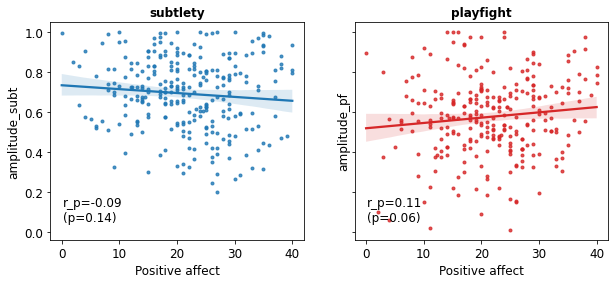

In [55]:
fig,axs = plt.subplots(figsize=(10,4),nrows=1,ncols=2, sharey=True)
ax = axs[0]
trait = 'Positive_reweigh'
param ='amplitude_subt'
explore_correlations(df, trait,param,ax,'tab:blue')
ax.set_title('subtlety',fontweight='bold')
ax.set_xlabel('Positive affect')

ax = axs[1]
trait = 'Positive_reweigh'
param ='amplitude_pf'
explore_correlations(df, trait,param,ax,'tab:red')
ax.set_title('playfight',fontweight='bold')
ax.set_xlabel('Positive affect')

In [56]:
amplitude = list(df['amplitude_subt'].values)
amplitude.extend(list(df['amplitude_pf'].values))

subID = list(df['subID'].values)
subID.extend(list(df['subID'].values))

In [78]:
df_long_amp = pd.DataFrame({'pos_affect': np.tile(df['Positive_reweigh'],2), 'amplitude':  amplitude, 'task':np.repeat([1,2],df.shape[0]), 'subID':subID })
df_long_amp['task'] =['task' + str(i) for i in df_long_amp['task']]
df_long_amp

,pos_affect,amplitude,task,subID
0,20.0,0.900821,task1,30002.0
1,25.0,0.805834,task1,30004.0
2,20.0,0.710131,task1,30005.0
3,25.0,0.989396,task1,30006.0
4,28.0,0.582252,task1,30008.0
...,...,...,...,...
543,14.0,0.493688,task2,30344.0
544,15.0,0.999799,task2,30345.0
545,27.0,0.708476,task2,30346.0
546,27.0,0.414670,task2,30348.0


In [60]:
model = Lmer(f'amplitude ~ pos_affect*task + (1|subID)', data=df_long_amp) # ff: anglesm rfx: subject ID
model.fit()

Formula: amplitude~pos_affect*task+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 548	 Groups: {'subID': 274.0}

Log-likelihood: 156.132 	 AIC: -312.265

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.017  0.131
Residual               0.018  0.136

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.735,0.673,0.797,0.032,441.03,23.220,0.000,***
pos_affect,-0.002,-0.005,0.001,0.001,441.03,-1.425,0.155,
tasktask2,-0.215,-0.278,-0.152,0.032,272.00,-6.671,0.000,***
pos_affect:tasktask2,0.005,0.002,0.007,0.001,272.00,3.312,0.001,**


In [61]:
model = Lm(f'amplitude_subt ~ Positive_reweigh', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: amplitude_subt~Positive_reweigh

Family: gaussian	 Estimator: OLS

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 274	 R^2: 0.008	 R^2_adj: 0.004

Log-likelihood: 78.645 	 AIC: -153.290	 BIC: -146.064

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
Intercept,0.735,0.675,0.795,0.031,272,24.032,0.000,***
Positive_reweigh,-0.002,-0.005,0.001,0.001,272,-1.475,0.141,


In [62]:
model = Lm(f'amplitude_pf ~ Positive_reweigh', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: amplitude_pf~Positive_reweigh

Family: gaussian	 Estimator: OLS

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 274	 R^2: 0.013	 R^2_adj: 0.009

Log-likelihood: 60.411 	 AIC: -116.822	 BIC: -109.596

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
Intercept,0.520,0.456,0.585,0.033,272,15.917,0.000,***
Positive_reweigh,0.003,-0.000,0.005,0.001,272,1.881,0.061,.


In [63]:
from scipy import stats

In [64]:
stats.ttest_rel(df['amplitude_subt'],df['amplitude_pf']), np.nanmean(df['amplitude_subt']-df['amplitude_pf'])

(Ttest_relResult(statistic=9.771751174436996, pvalue=1.555432107871016e-19),
 0.11526470961630976)

In [65]:
def explore_correlations_lineplot(df, trait,param,ax,col,label):

    sns.regplot(data=df,x=trait,y=param,ax=ax,marker = '.', color=col, scatter=False, label=label)
    x,y = df[trait], df[param]
    rows = (~np.isnan(x)) & (~np.isnan(y)) & (~np.isinf(x)) & (~np.isinf(y))
    x = x[rows]
    y = y[rows]
    x = x[rows]
    y = y[rows]
    r,p = pearsonr(x,y)
    r_subt[i,j],p_subt[i,j] = r,p
    if p < .05:
        color = 'k'
        fontweight = 'bold'
    else:
        color = 'k'
        fontweight = 'normal'
    # ax.annotate(f'r_p={r:.2f}\n({get_p(p)})',xy=(0.05,.95),xycoords='axes fraction', color = color, fontweight = fontweight, ha='left',va='top')

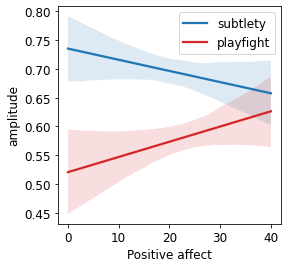

In [66]:
fig,ax = plt.subplots(figsize=(4,4),nrows=1,ncols=1, sharey=True)
trait = 'Positive_reweigh'
param ='amplitude_subt'
explore_correlations_lineplot(df, trait,param,ax,'tab:blue','subtlety')

trait = 'Positive_reweigh'
param ='amplitude_pf'
explore_correlations_lineplot(df, trait,param,ax,'tab:red','playfight')

plt.ylabel('amplitude')
plt.xlabel('Positive affect')
plt.legend()

In [67]:
x = df['Positive_reweigh'].describe()
x

count    274.000000
mean      21.696269
std        8.385318
min        0.000000
25%       16.000000
50%       21.500000
75%       28.000000
max       40.000000
Name: Positive_reweigh, dtype: float64

In [68]:
df_top = df.loc[df['Positive_reweigh']>x['50%'],:]
df_bottom = df.loc[df['Positive_reweigh']<x['50%'],:]

In [69]:
model = Lm(f'Positive_reweigh ~ amplitude_subt+amplitude_pf', data=df_bottom) # ff: anglesm rfx: subject ID
model.fit()

Formula: Positive_reweigh~amplitude_subt+amplitude_pf

Family: gaussian	 Estimator: OLS

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 137	 R^2: 0.014	 R^2_adj: -0.001

Log-likelihood: -412.018 	 AIC: 830.036	 BIC: 838.796

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
Intercept,15.850,11.968,19.732,1.963,134,8.075,0.000,***
amplitude_subt,-3.507,-9.349,2.335,2.954,134,-1.187,0.237,
amplitude_pf,2.732,-1.848,7.313,2.316,134,1.180,0.240,


In [70]:
model = Lm(f'Positive_reweigh ~ amplitude_subt+amplitude_pf', data=df_top) # ff: anglesm rfx: subject ID
model.fit()

Formula: Positive_reweigh~amplitude_subt+amplitude_pf

Family: gaussian	 Estimator: OLS

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 137	 R^2: 0.072	 R^2_adj: 0.058

Log-likelihood: -404.942 	 AIC: 815.884	 BIC: 824.644

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
Intercept,24.505,21.404,27.607,1.568,134,15.629,0.000,***
amplitude_subt,-0.266,-4.915,4.383,2.350,134,-0.113,0.910,
amplitude_pf,7.152,2.158,12.146,2.525,134,2.833,0.005,**


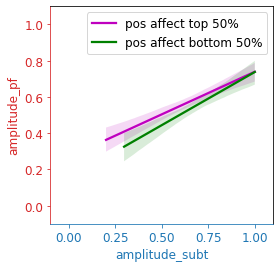

In [71]:
fig,ax = plt.subplots(figsize=(4,4),nrows=1,ncols=1, sharey=True)
# fig,axs = plt.subplots(figsize=(10,4),nrows=1,ncols=2, sharey=True)
# ax = axs[0]
trait = 'amplitude_subt'
param ='amplitude_pf'
explore_correlations_lineplot(df_top, trait,param,ax,'m','pos affect top 50%')

# ax = axs[1]
trait = 'amplitude_subt'
param ='amplitude_pf'
explore_correlations_lineplot(df_bottom, trait,param,ax,'g','pos affect bottom 50%')

xcolor = 'tab:blue'
ycolor = 'tab:red'
plt.ylabel('amplitude_pf', color = ycolor)
plt.xlabel('amplitude_subt', color = xcolor)
plt.xlim(-.1,1.1,)
plt.ylim(-.1,1.1)
ax.tick_params(axis='x', colors=xcolor)  # x-axis tick labels color set to red
ax.tick_params(axis='y', colors=ycolor)  # y-axis tick labels color set to red
ax.spines['bottom'].set_color(xcolor)  # X-axis color
ax.spines['left'].set_color(ycolor)     # Y-axis color
plt.legend()